# Plot independent valiable data and spectral values

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [11]:
# set to latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', serif='Computer Modern Roman')

In [12]:
# load the data containing all band values from each pixel in one image
csv_path_cleaned = r"path"
df_reg = pd.read_csv(csv_path_cleaned, delimiter = ',')

In [13]:
df_reg = df_reg.rename(columns={
    'Band_1': 'B1',
    'Band_2': 'B2',
    'Band_3': 'B3',
    'Band_4': 'B4',
    'Band_5': 'B5',
    'Band_6': 'B6',
    'Band_7': 'B7',
    'Band_8': 'B8',
    'Band_9': 'B8A',
    'Band_10': 'B9',
    'Band_11': 'B11',
    'Band_12': 'B12',
    'Band_13': 'ndvi',
    'Band_14': 'fai',
    'Band_15': 'savi',
    'Band_16': 'ndavi',
    'Band_17': 'mndwi',
    'Band_18': 'wavi',
    'Band_19': 'awi',
    'Band_20': 'expmean',
    'Band_21': 'taubmean',
    'Band_22': 'slope',
    'Band_23': 'msg',
    'Band_24': 'cart',
    'Band_25': 'rf',
    'Band_26': 'svm',
    'Band_27': 'knn',
    'Band_28': 'gbt',
    'Band_29': 'cons',
    'Band_30': 'SLOPE',
    'Band_31': 'DEM',
    'Band_32': 'MGS',
    'Band_33': 'SLOPE_2'
})

In [14]:
df_sample = df_reg.sample(frac=.01)

### Great Boplots and Violin-Plots to visualize the data

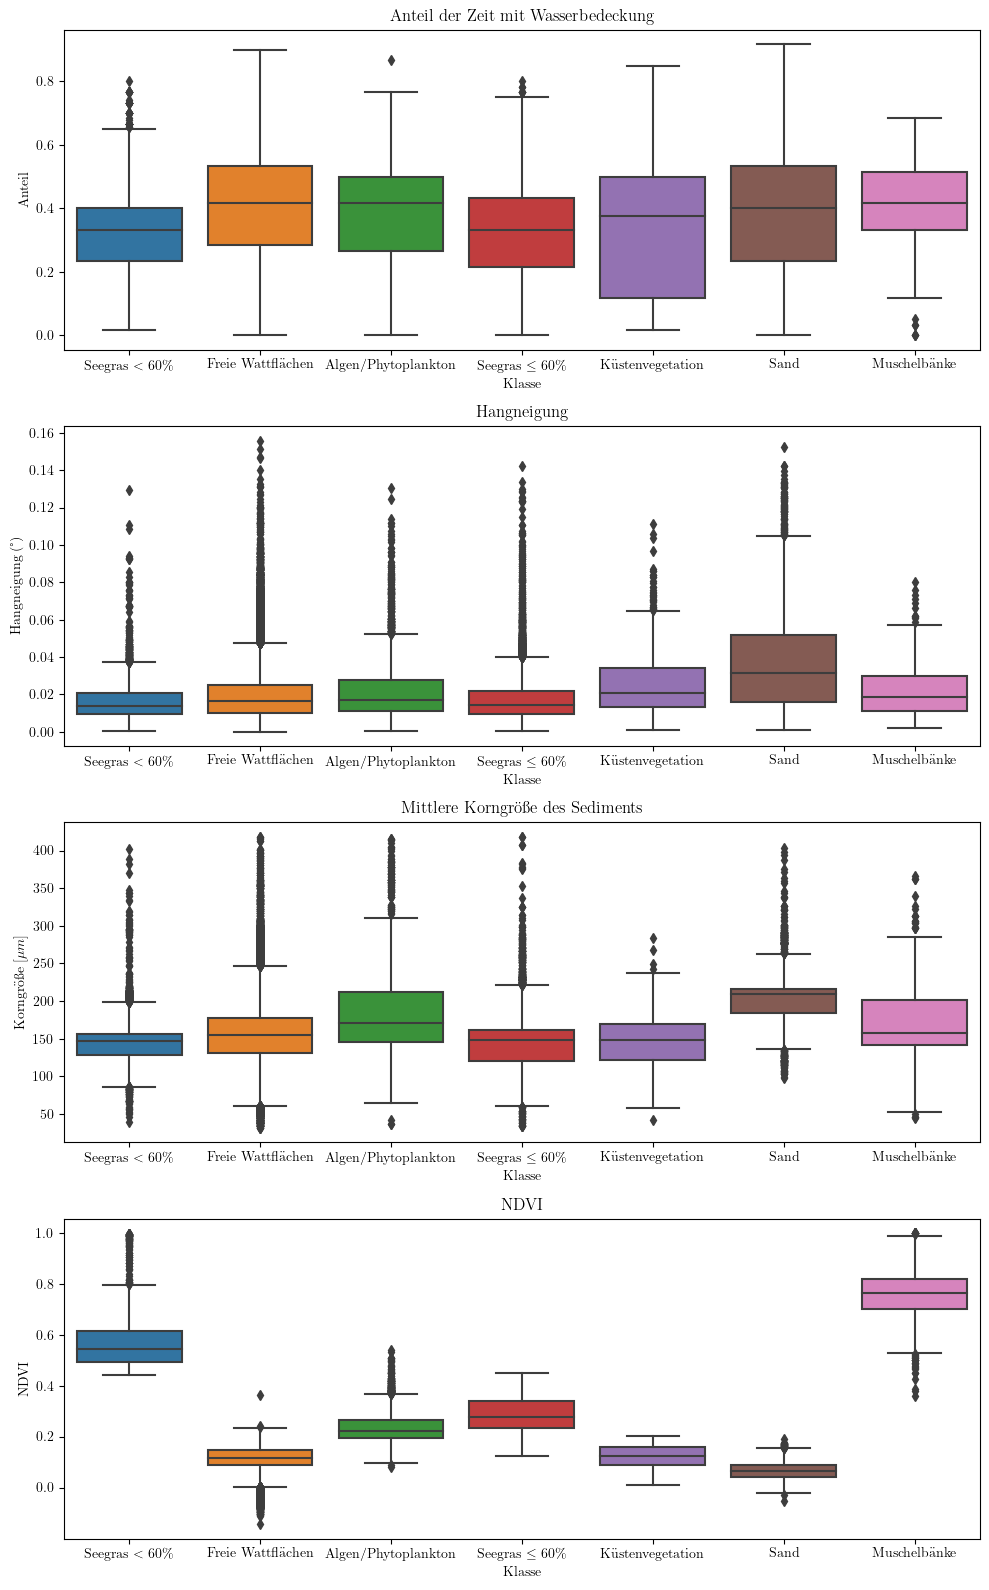

In [16]:
xlabel_mapping = {1: 'Freie Wattflächen', 2: 'Seegras $<$ 60\%', 3: 'Seegras $\leq$ 60\%', 4: 'Sand', 5: 'Muschelbänke', 6: 'Küstenvegetation', 7: 'Algen/Phytoplankton'}

df_sample['cons_name'] = df_sample['cons'].map(xlabel_mapping)

fig, axs = plt.subplots(4, 1, figsize=(10, 16))
axs = axs.flatten()

sns.boxplot(ax=axs[0], x='cons_name', y='DEM', data=df_sample)
axs[0].set_title('Anteil der Zeit mit Wasserbedeckung')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel('Klasse')

sns.boxplot(ax=axs[1], x='cons_name', y='SLOPE_2', data=df_sample)
axs[1].set_title('Hangneigung')
axs[1].set_ylabel('Hangneigung (°)')
axs[1].set_xlabel('Klasse')

sns.boxplot(ax=axs[2], x='cons_name', y='MGS', data=df_sample)
axs[2].set_title('Mittlere Korngröße des Sediments')
axs[2].set_ylabel('Korngröße [$\mu m$]')
axs[2].set_xlabel('Klasse')

sns.boxplot(ax=axs[3], x='cons_name', y='ndvi', data=df_sample)
axs[3].set_title('NDVI')
axs[3].set_ylabel('NDVI')
axs[3].set_xlabel('Klasse')

#sns.boxplot(ax=axs[4], x='cons_name', y='SLOPE', data=df_sample)
#axs[4].set_title('Hangneigung 2')
#axs[4].set_ylabel('Hangneigung (°)')
#axs[4].set_xlabel('Klasse')

plt.tight_layout()
plt.savefig(r"export_path")
plt.show()

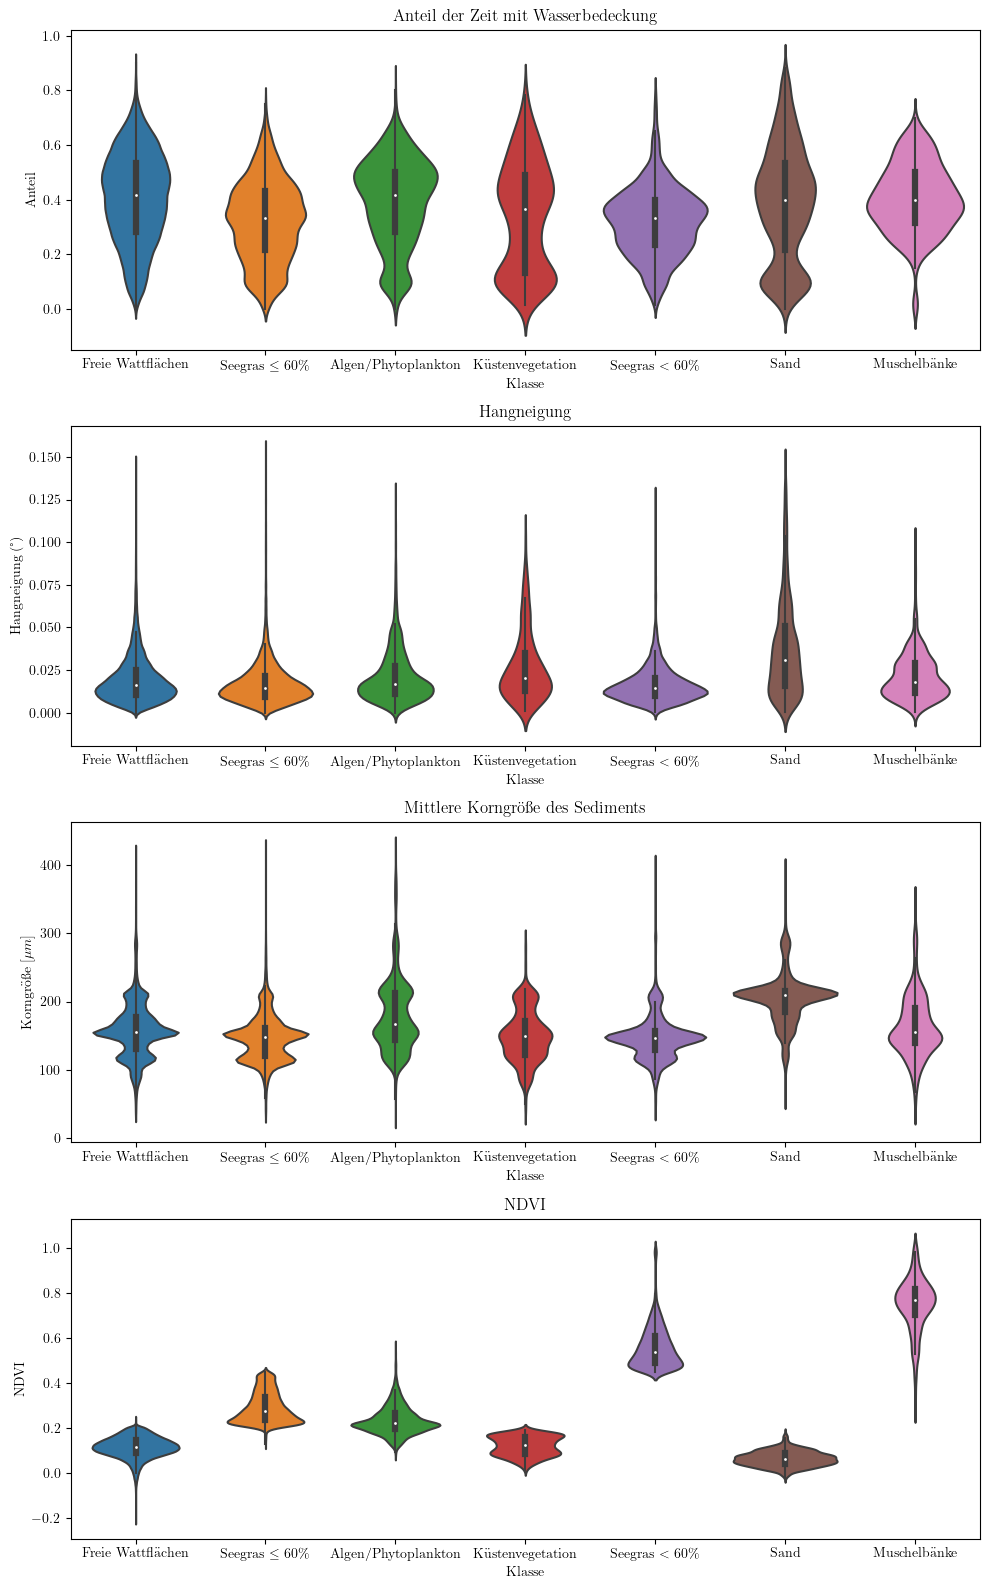

In [7]:
xlabel_mapping = {1: 'Freie Wattflächen', 2: 'Seegras $<$ 60\%', 3: 'Seegras $\leq$ 60\%', 4: 'Sand', 5: 'Muschelbänke', 6: 'Küstenvegetation', 7: 'Algen/Phytoplankton'}

df_sample['cons_name'] = df_sample['cons'].map(xlabel_mapping)

fig, axs = plt.subplots(4, 1, figsize=(10, 16))
axs = axs.flatten()

sns.violinplot(ax=axs[0], x='cons_name', y='DEM', data=df_sample)
axs[0].set_title('Anteil der Zeit mit Wasserbedeckung')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel('Klasse')

sns.violinplot(ax=axs[1], x='cons_name', y='SLOPE_2', data=df_sample)
axs[1].set_title('Hangneigung')
axs[1].set_ylabel('Hangneigung (°)')
axs[1].set_xlabel('Klasse')

sns.violinplot(ax=axs[2], x='cons_name', y='MGS', data=df_sample)
axs[2].set_title('Mittlere Korngröße des Sediments')
axs[2].set_ylabel('Korngröße [$\mu m$]')
axs[2].set_xlabel('Klasse')

sns.violinplot(ax=axs[3], x='cons_name', y='ndvi', data=df_sample)
axs[3].set_title('NDVI')
axs[3].set_ylabel('NDVI')
axs[3].set_xlabel('Klasse')

#sns.violinplot(ax=axs[4], x='cons_name', y='SLOPE', data=df_sample)
#axs[4].set_title('Hangneigung 2')
#axs[4].set_ylabel('Hangneigung (°)')
#axs[4].set_xlabel('Klasse')

plt.tight_layout()
plt.savefig(r"export_path")
plt.show()

# Spectral Space

In [2]:
# function to get grey values from an image
def concatenate_csv_files(directory):
    all_data = []

    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith(".csv") and filename.startswith("Samples_NF"):
                filepath = os.path.join(root, filename)
                
                df = pd.read_csv(filepath)
                all_data.append(df)

    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        
        combined_csv_path = os.path.join(directory, 'Samples_7K_combined.csv')
        combined_df.to_csv(combined_csv_path, index=False)
        print(f"Combined CSV file saved at: {combined_csv_path}")
    else:
        print("No CSV files found matching the criteria.")

directory_path = r"path"
concatenate_csv_files(directory_path)

Combined CSV file saved at: D:\BA2\Samples_7K_combined.csv


In [15]:
df_SS = pd.read_csv(r"csv with spectral data", delimiter=',')

In [16]:
df_SS.columns

Index(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11',
       'B12', 'NDVI', 'FAI', 'SAVI', 'NDAVI', 'MNDWI', 'WAVI', 'AVI',
       'classvalue', 'sample'],
      dtype='object')

In [17]:
df_C1 = df_SS[df_SS['classvalue'] == 1].copy()
df_C2 = df_SS[df_SS['classvalue'] == 2].copy()
df_C3 = df_SS[df_SS['classvalue'] == 3].copy()
df_C4 = df_SS[df_SS['classvalue'] == 4].copy()
df_C5 = df_SS[df_SS['classvalue'] == 5].copy()
df_C6 = df_SS[df_SS['classvalue'] == 6].copy()
df_C7 = df_SS[df_SS['classvalue'] == 7].copy()

In [18]:
df_1_med = df_C1[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].median()
df_2_med = df_C2[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].median()
df_3_med = df_C3[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].median()
df_4_med = df_C4[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].median()
df_5_med = df_C5[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].median()
df_6_med = df_C6[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].median()
df_7_med = df_C7[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].median()

<function matplotlib.pyplot.show(close=None, block=None)>

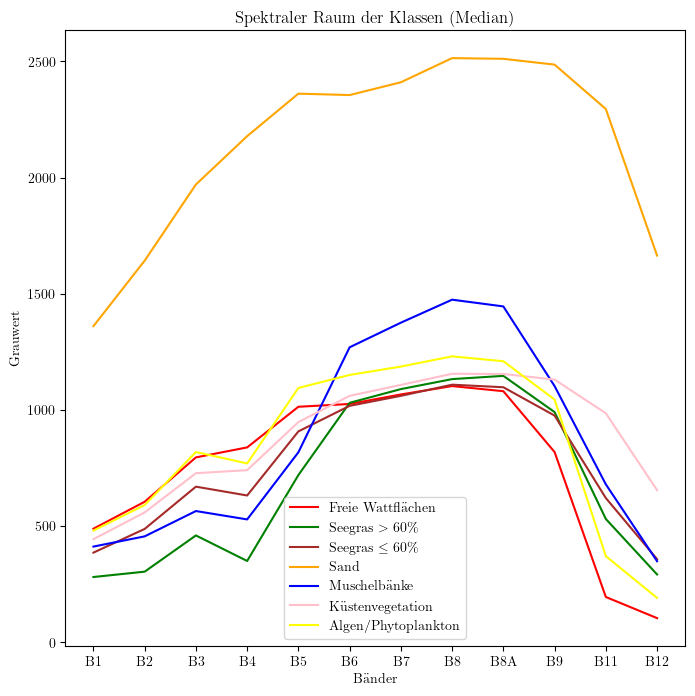

In [22]:
# plot with median
plt.figure(figsize=(8, 8))  
plt.plot(df_1_med, c='red', label='Freie Wattflächen')
plt.plot(df_2_med, c='green', label='Seegras $>$ 60\%')
plt.plot(df_3_med, c='brown', label='Seegras $\leq$ 60\%')
plt.plot(df_4_med, c='orange', label='Sand')
plt.plot(df_5_med, c='blue', label='Muschelbänke')
plt.plot(df_6_med, c='pink', label='Küstenvegetation')
plt.plot(df_7_med, c='yellow', label='Algen/Phytoplankton')
plt.xlabel('Bänder')
plt.ylabel('Grauwert')
plt.title('Spektraler Raum der Klassen (Median)')
plt.legend(loc='best')
plt.savefig(r"export_path")
plt.show

In [20]:
df_1_mean = df_C1[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].mean()
df_2_mean = df_C2[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].mean()
df_3_mean = df_C3[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].mean()
df_4_mean = df_C4[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].mean()
df_5_mean = df_C5[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].mean()
df_6_mean = df_C6[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].mean()
df_7_mean = df_C7[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

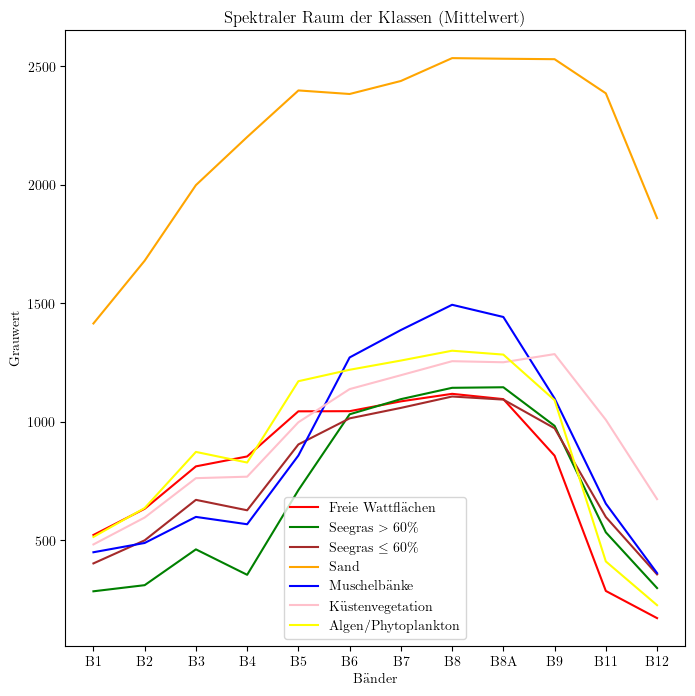

In [23]:
# plot with mean
plt.figure(figsize=(8, 8))  
plt.plot(df_1_mean, c='red', label='Freie Wattflächen')
plt.plot(df_2_mean, c='green', label='Seegras $>$ 60\%')
plt.plot(df_3_mean, c='brown', label='Seegras $\leq$ 60\%')
plt.plot(df_4_mean, c='orange', label='Sand')
plt.plot(df_5_mean, c='blue', label='Muschelbänke')
plt.plot(df_6_mean, c='pink', label='Küstenvegetation')
plt.plot(df_7_mean, c='yellow', label='Algen/Phytoplankton')
plt.xlabel('Bänder')
plt.ylabel('Grauwert')
plt.title('Spektraler Raum der Klassen (Mittelwert)')
plt.legend(loc='best')
plt.savefig(r"export_path")
plt.show